# The code below contains the analysis and machine learning applied to detect and classify brain Tumor

### Loading and analyzing the dataset

In [3]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.2 MB 9.6 MB/s eta 0:00:41
   ---------------------------------------- 0.9/390.2 MB 11.8 MB/s eta 0:00:34
   ---------------------------------------- 1.6/390.2 MB 12.5 MB/s eta 0:00:32
   ---------------------------------------- 2.4/390.2 MB 13.7 MB/s eta 0:00:29
   ---------------------------------------- 3.0/390.2 MB 14.5 MB/s eta 0:00:27
   ---------------------------------------- 3.6/390.2 MB 13.7 MB/s eta 0:00:29
   ---------------------------------------- 4.4/390.2 MB 14.8 MB/s eta 0:00:27
    --------------------------------------- 5.1/390.2 MB 14.8 MB/s eta 0:00:27
    --------------------------------------- 6.0/390.2 MB 15.3 MB/s eta 0:00:26
    --------------------------------------- 6.8/390.2 MB 15.4 MB/s 

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

### Providing folder paths for train and test

In [6]:
train_dir = r'C:\Users\sriji\Interview_prep\Python\Machine Learning\Brain_Tumor_classification\Training'
test_dir = r'C:\Users\sriji\Interview_prep\Python\Machine Learning\Brain_Tumor_classification\Testing'

### Using ImageDataGenerator to load and process images

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # You can change this size based on your needs
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


### Building a basic CNN model

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Helps in reducing overfitting
model.add(Dense(4, activation='softmax'))  # '4' corresponds to your 4 categories

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

C:\Users\sriji\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [9]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


C:\Users\sriji\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.4185 - loss: 1.2982 - val_accuracy: 0.3071 - val_loss: 1.7564
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 572ms/step - accuracy: 0.5858 - loss: 0.9684 - val_accuracy: 0.3782 - val_loss: 1.6817
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 580ms/step - accuracy: 0.6473 - loss: 0.8140 - val_accuracy: 0.4036 - val_loss: 2.3154
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 575ms/step - accuracy: 0.6960 - loss: 0.7262 - val_accuracy: 0.3604 - val_loss: 2.5640
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 635ms/step - accuracy: 0.7123 - loss: 0.6825 - val_accuracy: 0.4594 - val_loss: 2.1252
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 648ms/step - accuracy: 0.7323 - loss: 0.6159 - val_accuracy: 0.5558 - val_loss: 1.8389
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 626ms/step - accuracy: 0.7632 - loss: 0.5784 - val_accuracy: 0.4949 - val_loss: 2.0033
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 631ms/step - accuracy: 0.7802 - loss: 0.5324 - val_accurac

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.5268 - loss: 2.7218
Test Accuracy: 0.54
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.15      0.02      0.04       100
meningioma_tumor       0.34      0.26      0.29       115
        no_tumor       0.29      0.69      0.41       105
 pituitary_tumor       0.21      0.12      0.16        74

        accuracy                           0.29       394
       macro avg       0.25      0.27      0.22       394
    weighted avg       0.25      0.29      0.23       394



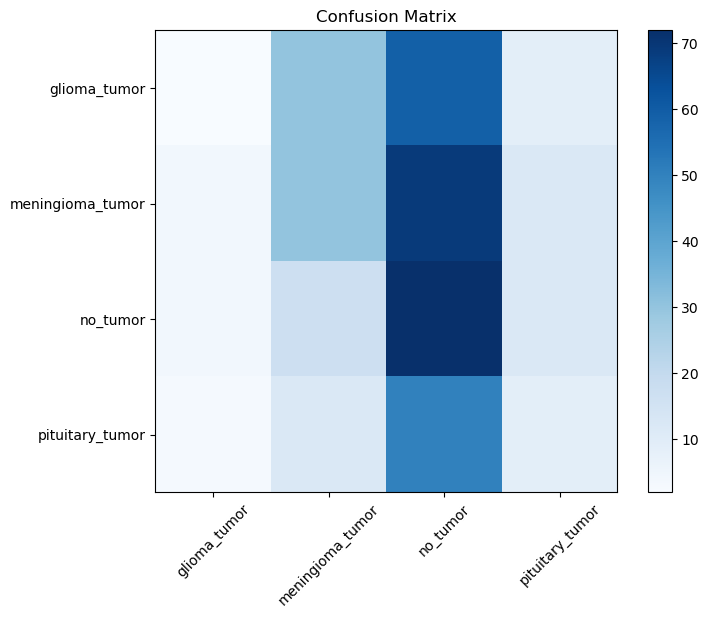

In [10]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions and get the classification report
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.show()

In [11]:
model.save('tumor_classification_model.h5')

In [13]:
model.save('tumor_classification_model.keras')

1. Data Augmentation
What is it?
Data augmentation involves creating new training examples by applying random transformations (like rotation, flipping, zooming, etc.) to your existing dataset. This helps increase the diversity of the training data without actually collecting more images.

Why Use Data Augmentation?
Prevents Overfitting: By showing slightly altered versions of the same image, the model learns to generalize better.
Improves Robustness: The model becomes more resilient to variations in real-world data.
When to Use It?
If you have a small to medium-sized dataset, data augmentation can help improve performance.
It’s also useful when you notice that your model is overfitting (high accuracy on training data but low accuracy on validation/test data).

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate images up to 20 degrees
    width_shift_range=0.1,  # Shift the image width by 10%
    height_shift_range=0.1, # Shift the image height by 10%
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Zoom in/out by 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill pixels when rotating or shifting
)

# Apply augmentation to the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# No augmentation for test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Helps in reducing overfitting
model.add(Dense(4, activation='softmax'))  # '4' corresponds to your 4 categories

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

C:\Users\sriji\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

C:\Users\sriji\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 531ms/step - accuracy: 0.3459 - loss: 1.3623 - val_accuracy: 0.2310 - val_loss: 1.6404
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 524ms/step - accuracy: 0.4779 - loss: 1.1339 - val_accuracy: 0.3477 - val_loss: 1.9925
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 542ms/step - accuracy: 0.5550 - loss: 0.9959 - val_accuracy: 0.3503 - val_loss: 2.8074
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 540ms/step - accuracy: 0.6294 - loss: 0.8828 - val_accuracy: 0.3528 - val_loss: 3.2543
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 530ms/step - accuracy: 0.6621 - loss: 0.8121 - val_accuracy: 0.3477 - val_loss: 2.8094


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.3669 - loss: 2.7175
Test Accuracy: 0.35
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.27      0.04      0.07       100
meningioma_tumor       0.33      0.16      0.21       115
        no_tumor       0.27      0.74      0.39       105
 pituitary_tumor       0.09      0.04      0.06        74

        accuracy                           0.26       394
       macro avg       0.24      0.24      0.18       394
    weighted avg       0.25      0.26      0.20       394



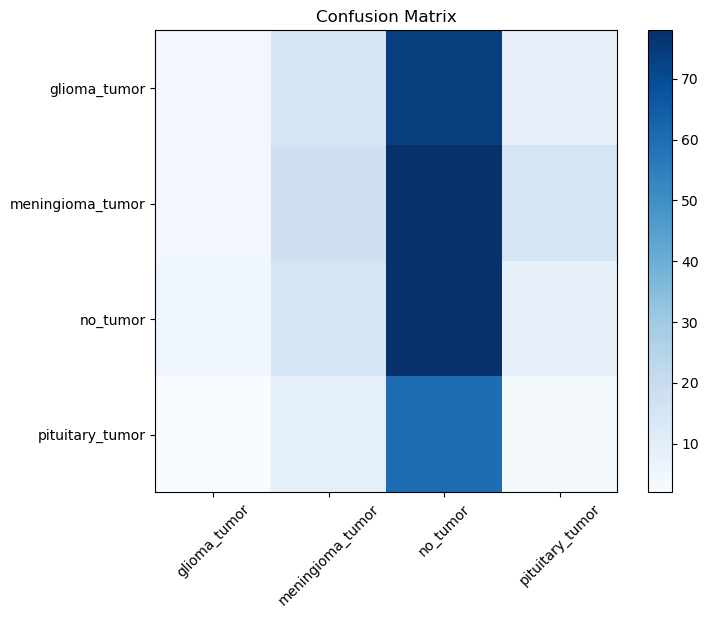

In [17]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions and get the classification report
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.show()